In [1]:


from tensorflow_docs.vis import embed
from tensorflow import keras
from imutils import paths

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import cv2
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import random


2022-11-11 11:37:10.101973: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-11 11:37:10.193242: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-11 11:37:10.196756: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-11 11:37:10.196765: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

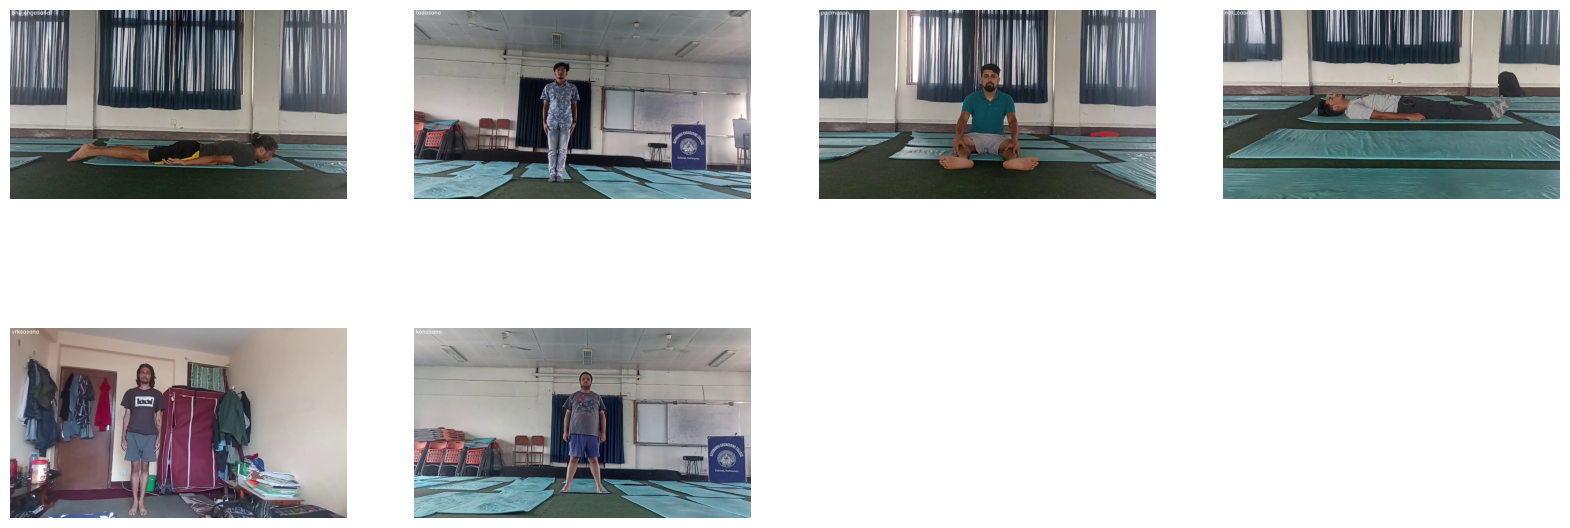

In [4]:

# Create a Matplotlib figure and specify the size of the figure.
plt.figure(figsize = (20, 20))
 
# Get the names of all classes/categories in UCF50.
all_classes_names = os.listdir('data')
 
# Generate a list of 20 random values. The values will be between 0-50, 
# where 50 is the total number of class in the dataset. 
random_range = random.sample(range(len(all_classes_names)), 6)
 
# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):
 
    # Retrieve a Class Name using the Random Index.
    selected_class_Name = all_classes_names[random_index]
 
    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = os.listdir(f'data/{selected_class_Name}')
 
    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)
 
    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(f'data/{selected_class_Name}/{selected_video_file_name}')
    
    # Read the first frame of the video file.
    _, bgr_frame = video_reader.read()
 
    # Release the VideoCapture object. 
    video_reader.release()
 
    # Convert the frame from BGR into RGB format. 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
 
    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Display the frame.
    plt.subplot(5, 4, counter);plt.imshow(rgb_frame);plt.axis('off')

In [2]:
df = pd.read_csv("data.csv")

In [27]:
train = df.sample(frac=0.8, replace=False, random_state=1)
test = df.drop(train.index)

,Unnamed: 0,tag,video_name
306,306,konasana,data/konasana/konasana_81.mp4
342,342,konasana,data/konasana/konasana_144.mp4
47,47,padmasan,data/padmasan/padmasan_43.mp4
67,67,bhujangasana,data/bhujangasana/bhujangasana_14.mp4
376,376,tadasana,data/tadasana/tadasana_31.mp4
...,...,...,...
321,321,konasana,data/konasana/konasana_163.mp4
183,183,konasana,data/konasana/konasana_116.mp4
151,151,not_cobra,data/not_cobra/not_cobra_31.mp4
455,455,vrksasana,data/vrksasana/vrksasana_20.mp4


In [29]:
test.reset_index(inplace = True)
train.reset_index(inplace = True)

In [37]:
train.drop(columns =["index" , "Unnamed: 0"],inplace = True)
test.drop(columns =["index" , "Unnamed: 0"],inplace = True)

In [42]:
train.to_csv("train.csv")
test.to_csv("test.csv")

In [ ]:
#gpu config 

# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   try:
#     tf.config.experimental.set_virtual_device_configuration(
#         gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
#   except RuntimeError as e:
#     print(e)



In [43]:
IMG_SIZE = 224


def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)


In [44]:
def build_feature_extractor():
    feature_extractor = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.inception_v3.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")


feature_extractor = build_feature_extractor()

2022-11-11 10:07:25.557406: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aavash/Desktop/envrionments/major_project/lib/python3.8/site-packages/cv2/../../lib64:
2022-11-11 10:07:25.557824: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-11 10:07:25.557858: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aavashl13): /proc/driver/nvidia/version does not exist
2022-11-11 10:07:25.558343: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriat

87910968/87910968 [==============================] - 9s 0us/step


In [46]:
label_processor = keras.layers.StringLookup(num_oov_indices=0, vocabulary=np.unique(train["tag"]))
print(label_processor.get_vocabulary())

labels = train["tag"].values
labels = label_processor(labels[..., None]).numpy()



['bhujangasana', 'konasana', 'not_cobra', 'padmasan', 'tadasana', 'vrksasana']


array([[1],
       [1],
       [3],
       [0],
       [4],
       [1],
       [1],
       [3],
       [1],
       [0],
       [4],
       [2],
       [0],
       [0],
       [1],
       [1],
       [4],
       [1],
       [2],
       [2],
       [1],
       [1],
       [5],
       [5],
       [0],
       [4],
       [3],
       [1],
       [2],
       [1],
       [1],
       [5],
       [1],
       [5],
       [1],
       [0],
       [5],
       [3],
       [5],
       [4],
       [1],
       [5],
       [4],
       [1],
       [5],
       [1],
       [5],
       [4],
       [4],
       [0],
       [2],
       [1],
       [3],
       [5],
       [5],
       [0],
       [5],
       [1],
       [3],
       [1],
       [1],
       [0],
       [1],
       [5],
       [5],
       [1],
       [4],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [3],
       [0],
       [5],
       [1],
       [1],
       [5],
       [0],
       [1],
       [0],
       [1],
    

In [47]:
IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 100

MAX_SEQ_LENGTH = 20
NUM_FEATURES = 2048

,tag,video_name
0,konasana,data/konasana/konasana_81.mp4
1,konasana,data/konasana/konasana_144.mp4
2,padmasan,data/padmasan/padmasan_43.mp4
3,bhujangasana,data/bhujangasana/bhujangasana_14.mp4
4,tadasana,data/tadasana/tadasana_31.mp4
...,...,...
397,konasana,data/konasana/konasana_163.mp4
398,konasana,data/konasana/konasana_116.mp4
399,not_cobra,data/not_cobra/not_cobra_31.mp4
400,vrksasana,data/vrksasana/vrksasana_20.mp4


In [49]:


def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = df["video_name"].values.tolist()
    
    ##take all classlabels from train_df column named 'tag' and store in labels
    labels = df["tag"].values
    
    #convert classlabels to label encoding
    labels = label_processor(labels[..., None]).numpy()

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool") # 145,20
    frame_features = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32") #145,20,2048

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels


train_data, train_labels = prepare_all_videos(train, "train")
test_data, test_labels = prepare_all_videos(test, "test")

print(f"Frame features in train set: {train_data[0].shape}")
print(f"Frame masks in train set: {train_data[1].shape}")



print(f"train_labels in train set: {train_labels.shape}")

print(f"test_labels in train set: {test_labels.shape}")

Frame features in train set: (402, 20, 2048)
Frame masks in train set: (402, 20)
train_labels in train set: (402, 1)
test_labels in train set: (101, 1)


In [51]:
def get_sequence_model():
    class_vocab = label_processor.get_vocabulary()

    frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
    mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

    # Refer to the following tutorial to understand the significance of using `mask`:
    # https://keras.io/api/layers/recurrent_layers/gru/
    x = keras.layers.GRU(16, return_sequences=True)(frame_features_input, mask=mask_input)
    x = keras.layers.GRU(8)(x)
    x = keras.layers.Dropout(0.4)(x)
    x = keras.layers.Dense(8, activation="relu")(x)
    output = keras.layers.Dense(len(class_vocab), activation="softmax")(x)

    rnn_model = keras.Model([frame_features_input, mask_input], output)

    rnn_model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return rnn_model


In [55]:
EPOCHS = 100
# Utility for running experiments.
def run_experiment():
    filepath = "./tmp/video_classifier"
    checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only=True, verbose=1
    )

    seq_model = get_sequence_model()
    history = seq_model.fit(
        [train_data[0], train_data[1]],
        train_labels,
        validation_split=0.3,
        epochs=EPOCHS,
        callbacks=[checkpoint],
    )

    seq_model.load_weights(filepath)
    _, accuracy = seq_model.evaluate([test_data[0], test_data[1]], test_labels)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return history, seq_model


_, sequence_model = run_experiment()

Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 1.7902 - accuracy: 0.3274
Epoch 1: val_loss improved from inf to 1.78842, saving model to ./tmp/video_classifier
9/9 [==============================] - 5s 170ms/step - loss: 1.7902 - accuracy: 0.3274 - val_loss: 1.7884 - val_accuracy: 0.3388
Epoch 2/100
8/9 [=========================>....] - ETA: 0s - loss: 1.7867 - accuracy: 0.3516
Epoch 2: val_loss improved from 1.78842 to 1.78511, saving model to ./tmp/video_classifier
9/9 [==============================] - 0s 21ms/step - loss: 1.7867 - accuracy: 0.3452 - val_loss: 1.7851 - val_accuracy: 0.3388
Epoch 3/100
9/9 [==============================] - ETA: 0s - loss: 1.7833 - accuracy: 0.3452
Epoch 3: val_loss improved from 1.78511 to 1.78189, saving model to ./tmp/video_classifier
9/9 [==============================] - 0s 21ms/step - loss: 1.7833 - accuracy: 0.3452 - val_loss: 1.7819 - val_accuracy: 0.3388
Epoch 4/100
9/9 [==============================] - ETA: 0s - loss: 

In [56]:
def prepare_single_video(frames):
    frames = frames[None, ...]
    frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :])
        frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

    return frame_features, frame_mask


def sequence_prediction(path):
    class_vocab = label_processor.get_vocabulary()

    frames = load_video(os.path.join("test", path))
    frame_features, frame_mask = prepare_single_video(frames)
    probabilities = sequence_model.predict([frame_features, frame_mask])[0]

    for i in np.argsort(probabilities)[::-1]:
        print(f"  {class_vocab[i]}: {probabilities[i] * 100:5.2f}%")
    return frames

test_video = np.random.choice(test["video_name"].values.tolist())
print(f"Test video path: {test_video}")

test_frames = sequence_prediction(test_video)

Test video path: data/padmasan/padmasan_24.mp4
1/1 [==============================] - 1s 1s/step
  konasana: 30.25%
  vrksasana: 21.50%
  bhujangasana: 16.34%
  padmasan: 11.23%
  tadasana: 10.56%
  not_cobra: 10.13%
